In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, draw, io
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.filters import sobel
from matplotlib import cm


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


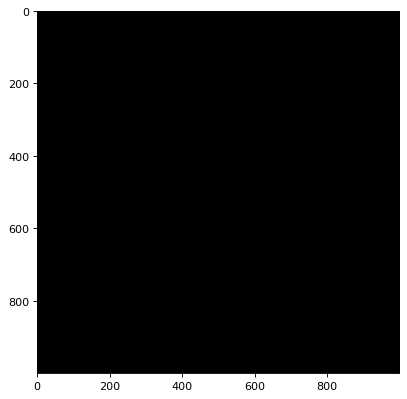

In [3]:
#Creating a Black background
A1 = np.zeros([1000,1000])
print(A1)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(A1,cmap='gray')

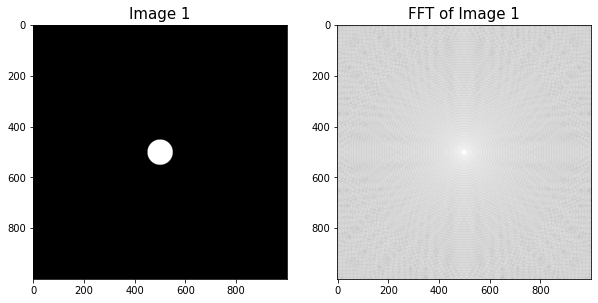

In [4]:
A1 = np.zeros([1000,1000])
row1, col1 = draw.disk((500,500), 50)
A1[row1, col1] = 1
A1_fourier = np.fft.fftshift(np.fft.fft2(A1))
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(A1,cmap='gray')
ax[0].set_title('Image 1', fontsize = 15)
ax[1].set_title('FFT of Image 1',fontsize=15)
ax[1].imshow(np.log(abs(A1_fourier)),cmap='gray')

#This is first image

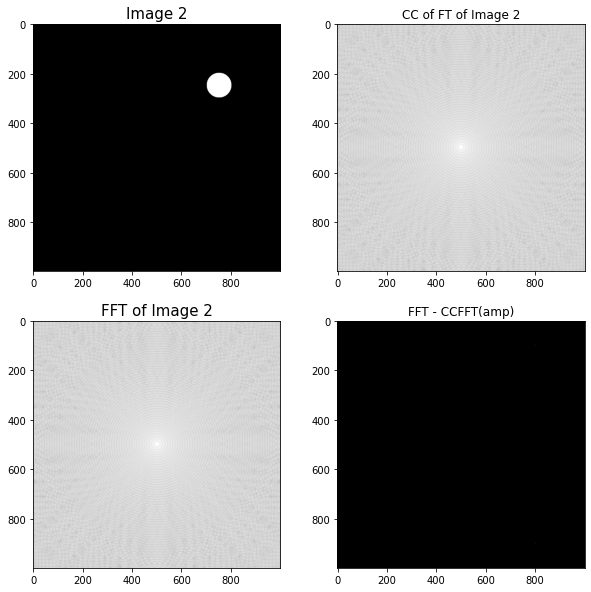

In [6]:
A2 = np.zeros([1000,1000])
row2, col2 = draw.disk((250,750), 50)
A2[row2,col2]=1
A2_fourier = np.fft.fftshift(np.fft.fft2(A2))

A2_amp = np.abs(A2_fourier)
A2_phase = np.angle(A2_fourier)
#Creating a Complex Conjugate
A2_cc = A2_amp*np.exp(-1j*A2_phase)
diff = np.abs(A2_fourier) - np.abs(A2_cc)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(A2,cmap='gray')
ax[0,0].set_title('Image 2', fontsize = 15)
ax[1,0].set_title('FFT of Image 2',fontsize=15)
ax[1,0].imshow(np.log(np.abs(A2_fourier)),cmap='gray')
ax[0,1].set_title('CC of FT of Image 2')
ax[0,1].imshow(np.log(np.abs(A2_cc)),cmap='gray')
ax[1,1].set_title('FFT - CCFFT(amp)')
ax[1,1].imshow(diff,cmap='gray')


## Finally making some phase correlation plots

1.0000000000000002
(array([250], dtype=int64), array([750], dtype=int64))
[[4.36676679e-20 2.44498000e-20 2.35541091e-20 ... 6.38334030e-20
  6.36070563e-20 4.18429369e-20]
 [7.54966196e-20 9.42283222e-20 5.71403847e-20 ... 3.07699308e-20
  1.15875239e-19 1.01365290e-19]
 [3.75973456e-20 9.62543198e-20 6.23674559e-20 ... 7.28966086e-20
  9.03312525e-20 7.66019559e-20]
 ...
 [3.21540292e-20 9.52946745e-20 3.01853212e-20 ... 1.37260181e-19
  9.78158325e-20 6.68680165e-20]
 [9.86096010e-20 5.92486004e-20 1.33825604e-19 ... 1.48961208e-19
  5.40659789e-20 5.41546821e-20]
 [6.29646679e-20 1.37660361e-20 1.79465755e-20 ... 1.67156217e-19
  2.66291859e-20 1.04957153e-19]]


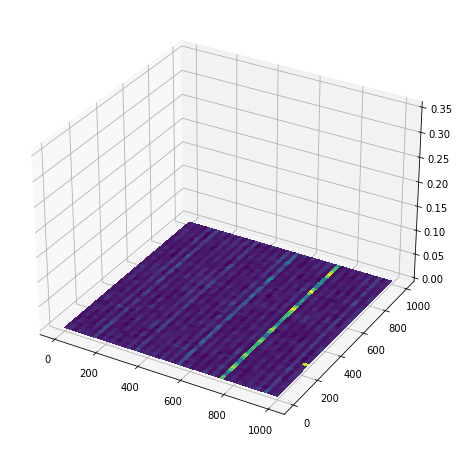

In [9]:
C_fourier = A1_fourier*A2_cc
C_norm = (C_fourier)/(np.abs(A1_fourier*A2_fourier))
C = np.fft.ifft2(C_norm)
#plt.figure(num=None, figsize=(8, 8), dpi=80)
#plt.imshow(np.abs(C),cmap='gray')
print(np.max(np.abs(C)))
print(np.where(np.abs(C) == 1.0000000000000002))
print(np.abs(C))

elevation_map = sobel(np.abs(C))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

m, n=elevation_map.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, elevation_map, cmap=cm.viridis, antialiased=False)
ax.axis("on")
#ax.set_facecolor('black')
plt.show()



In [92]:
print(np.abs(C)[0:253,750])

[3.87366535e-18 1.26915237e-18 1.47370741e-17 1.23755797e-18
 1.88596063e-18 4.55330775e-19 5.83912677e-18 1.01633611e-18
 1.89405977e-18 1.38848510e-18 1.89404878e-17 2.25077455e-18
 2.24143004e-18 1.59381607e-18 7.63648981e-18 1.08716014e-18
 4.94595463e-18 2.36541597e-18 1.04076535e-17 2.67046634e-18
 1.43515729e-19 2.08127309e-18 3.75868481e-18 1.15735574e-18
 1.22543726e-19 3.85156808e-18 3.69686082e-18 1.56618411e-18
 2.35031666e-18 2.44332640e-18 5.71152583e-18 7.54801526e-19
 6.27760258e-18 9.19490918e-20 5.34530452e-18 8.46885434e-19
 2.30239711e-18 2.31427156e-18 9.57849150e-19 1.72798651e-18
 1.28221041e-18 1.53864521e-18 1.18307050e-17 1.68100374e-18
 6.27929172e-19 1.79716038e-18 3.02658749e-18 1.21888952e-18
 1.17396284e-18 1.88625648e-18 2.69788516e-17 9.91260682e-19
 1.59697139e-18 1.33843254e-18 1.96349182e-18 1.09509049e-18
 1.66908547e-18 1.92164085e-18 3.22931292e-18 1.02259838e-18
 2.85082057e-18 1.38346398e-18 6.05583776e-18 1.44799846e-18
 1.72225321e-18 8.858711

## Learning till now from : 
## [For more on Sobel etc.](https://scikit-image.org/docs/stable/user_guide/tutorial_segmentation.html) 
## [drawing and filling shapes, has perimeter draws also](https://coderzcolumn.com/tutorials/python/how-to-draw-shapes-on-images-using-scikit-image-python) 
## [np.abs and np.angle and other Fourier Transforms](https://numpy.org/doc/stable/reference/routines.fft.html)
## [The best article on visualisation](https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b)

